<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/9_6OB%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. 모델 훈련
##4.1 선형 회귀
회귀에 가장 잘 사용되는 성능 지표는 RMSE

###4.1.1 정규 방정식

In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.rand(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]  #모든 샘플에 x0 = 1을 추가한다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.44612829],
       [3.05901725]])

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  #모든 샘플에 X0 = 1을 추가합니다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44612829],
       [10.56416279]])

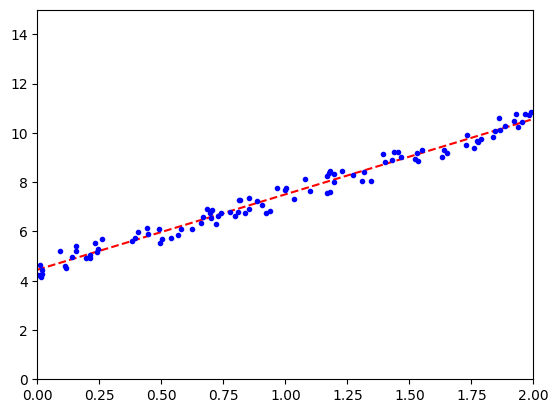

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r--')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [6]:
#사이킷런에서 선형회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.44612829]), array([[3.05901725]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.44612829],
       [10.56416279]])

LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 한다

In [8]:
theta_best_svd, residuals,rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.44612829],
       [3.05901725]])

유사역행렬: 특잇값분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산
SVD : 훈련 세트 X를 3개의 행렬곱셈으로 분해

In [ ]:
#유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.42099698],
       [3.05943362]])

###4.1.2 계산 복잡도
LinearRegression의 SVD방법에서는 특성의 개수가 2배 늘어나면 계산 시간은 대략 2^2배가 된다.</br>
선형 회귀 모델은 예측이 매우 빠름. 예측 계산 복잡도는 샘플 수와 선형적이기에 샘플이 2배 늘어나면 시간도 2배가 됨

##4.2 경사하강법(GD)
비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해나가는 것</br>
중요한 파라미터는 스텝의 크기로 학습률 하이퍼파라미터로 결정됨.</br>

###4.2.1 배치 경사 하강법
편도 함수: 모델 파라미터가 변경될 때 비용함수가 얼마나 바뀌는지 계산해야 한다
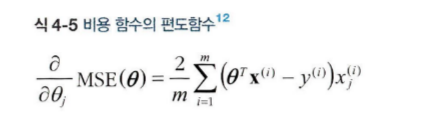

배치 경사 하강법은 전체 훈련 세트 X에 대해 계산한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다.

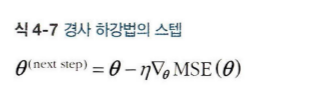

In [ ]:
#위의 식을 알고리즘으로 구현
eta = 0.1   #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  #무작위 초기화

for iternation in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.42099698],
       [3.05943362]])

정규방정식으로 찾은 것과 완벽하게 동일하다

###4.2.2 확률적 경사 하강법
매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산한다.</br>
알고리즘이 확실히 빠르며 매우 큰 훈련 세트에서도 가능하다.</br>
다만 확률(무작위)이기에 배치 경사 하강법보다 훨씬 불안정하다.</br>
단점은 점진적으로  감소시키면서 완화시킬 수 있다.

In [19]:
#확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5, 50  #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m) :
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [20]:
theta

array([[3.05830591],
       [0.11257756]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.37361526]), array([0.71332992]))

###4.2.3 미니배치 경사 하강법
미니배치라고 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산.</br> GPU를 사용해서 얻는 성능 향상이 장점.</br>
SGD보다 덜 불규칙하게 움직이기에 최솟값에 더 가까이 도달할 수는 있지만, 지역 최솟값에서 빠져나오지 못할 수도 있다.

##4.3 다항 회귀
비선형 데이터를 학습하는 데 선형 모델을 사용하는 것

In [9]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.6520096])

In [11]:
#X_poly는 원래 특성 X와 특성의 제곱을 포함한다
X_poly[0]

array([-0.6520096 ,  0.42511651])

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97306816]), array([[0.97072806, 0.48217896]]))

##4.4 학습 곡선
훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.</br>
그래프 생성을 위해서는 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련 시키면 된다.

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
  X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
  train_errors, val_errors = [],[]
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label = 'train set')
  plt.plot(np.sqrt(val_errors), 'b--', linewidth=3, label = 'test set')
  plt.ylim(0,3)
  plt.legend()
  plt.show()

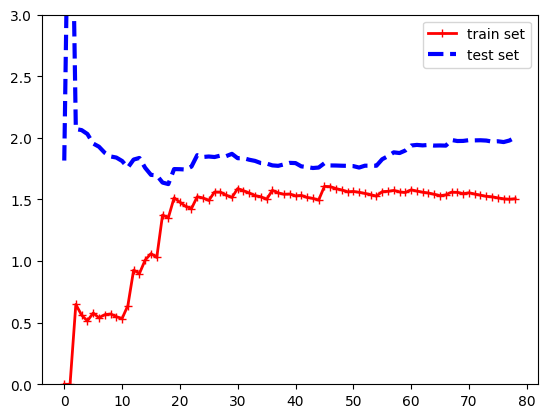

In [14]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

같은 데이터에서 10차 다항 회귀 모델의 학습곡선

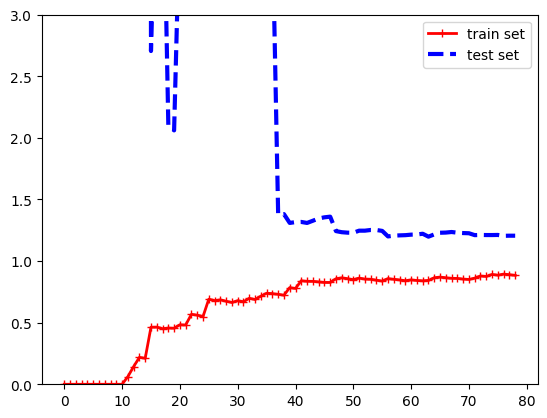

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)




1.   훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
2.   두 곡선 사이에는 공간이 있다</br> -> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다. 과대적합 모델의 특징</br>



##4.5 규제가 있는 선형 모델
과대적합을 감소시키는 방법으로 선형 회귀 모델에서는 가중치를 제한한다

###4.5.1 릿지 회귀(티호노프 규제)
규제가 추가된 선형 회귀 버전으로 모델의 가중치가 가능한 작게 유지되도록 한다.</br>
규제항은 훈련하는 동안에만 비용함수에 추가되며 훈련이 끝나면 모델을 규제가 없는 성능 지표로 평가한다.
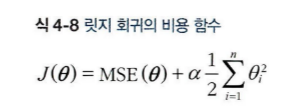

하이퍼파라미터는 a를 얼마나 많이 규제할 것인지를 결정한다.</br>
a = 0 이면 릿지 회귀는 선형 회귀와 같아진다</br>
릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도, 경사 하강법을 사용할 수도 있다

In [16]:
#사이킷런을 이용한 릿지 회귀 적용 예시
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.49668372]])

In [22]:
#확률적 경사 하강법을 이용하였을 때
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.44807693])

###4.5.2 라쏘 회귀
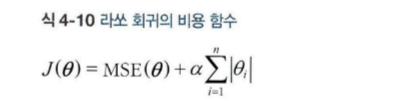

덜 중요한 가중치를 제거하려고 한다.즉, 가중치가 0이 된다.</br>
릿지와가 라쏘와 다른 점
1. 파라미터가 최적점에 가까워질수록 그레이디언트가 작아진다.
2. a를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 하지만 완전히 0이 되지는 않는다.

In [23]:
#Lasso를 이용한 사이킷런 예시
from sklearn.linear_model import Lasso
lasso_reg  = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.43762403])

###.4.5.3 엘라스틱넷
릿지와 라쏘 회귀를 절충한 모델</br>
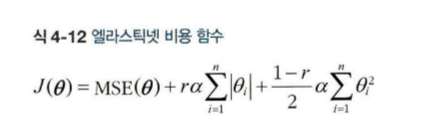

In [24]:
#사이킷런의 ElasticNet을 이용한 예시
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.44504007])

###4.5.4 조기 종료
검증 에러가 최솟값에 도달하면 바로 훈련을 중지 시키는 것

In [25]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled,y_train.ravel())   #훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

##4.6 로지스틱 회귀
샘플이 특정 클래스에 속할 확률을 추정하는 데 사용된다.

###4.6.1 확률 추정
입력 특성의 가중치 합을 계산하고 편향을 더한다.</br>
그 후 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력한다.

###4.6.2 훈련과 비용함수
양성 샘플(y=1)에 대해서는 높은 확률 추정, 음성 샘플(y=0)에 대해서는 낮은 확률 추정을 하는 파라미터를 찾는다.

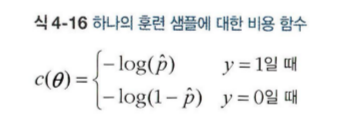

이에서는 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가하게 될 것이며 이 반대도 마찬가지이다.</br>
로지스틱 회귀의 비용함수의 최솟값을 계산하는 방법은 알려진 게 없다.

###4.6.3 결정 경계


In [26]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [27]:
X = iris['data'][:,3:]  # 꽃잎의 너비
y = (iris["target"]==2).astype(int)  #1 Iris-Virginica면 1, 그렇지 않으면 0

In [28]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

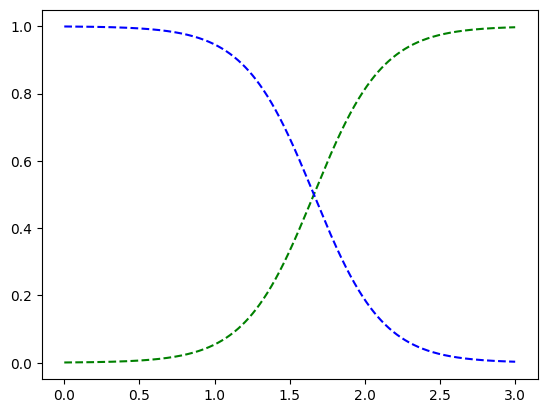

In [29]:
#꽃잎의 너비가 0-3cm 추정
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g--', label = 'Iris virinica')
plt.plot(X_new, y_proba[:,0], 'b--', label = "Not Iris virginica")

In [30]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

###4.6.4 소프트맥스 회귀
여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 하는 회귀

In [31]:
X = iris['data'][:, (2,3)]  #꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class ='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [32]:
softmax_reg.predict([[5,2]])

array([2])

In [33]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])